# Manipulating_Time_Series_Data

## Working with Time Series in Pandas
### How to use dates & times with pandas
#### Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and day_name() for each date.

We have already imported pandas as pd for you.

1. Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
2. Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.

In [1]:
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Indexing & resampling time series
#### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().


We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.

- Inspect data using .info().
- Use pd.to_datetime to convert the column 'date' to dtype datetime64.
- Set the 'date' column as index.
- Validate the changes by inspecting data using .info() again.
- Plot data using subplots=True.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

while 'DATABASE' not in os.listdir():
    
    os.chdir('..')
    
    #print(' ... ready to import f_functions ...')

In [3]:
data = pd.read_csv('DATABASE/air_quality_data/nyc.csv')

# Inspect data
print(data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [4]:
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index("date", inplace = True)

# Inspect data 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


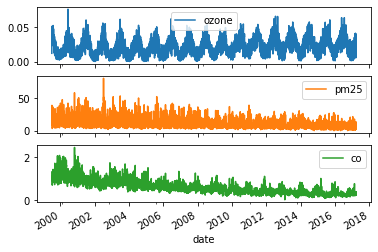

In [5]:

# Plot data
data.plot(subplots = True) ;plt.show()

#### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.


We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

- Create an empty pd.DataFrame() called prices.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
- Use the iteration variable to select the data for this year and the column price.
1. Use .reset_index() with drop=True to remove the DatetimeIndex.
2. Rename the column price column to the appropriate year.
3. Use pd.concat() to combine the yearly data with the data in prices along axis=1.
- Plot prices.

In [6]:
yahoo = pd.read_csv('DATABASE/stock_data/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66
...,...,...
777,2015-12-25,NaN
778,2015-12-28,33.60
779,2015-12-29,34.04
780,2015-12-30,33.37


In [7]:
yahoo  = yahoo.set_index('date')


yahoo.columns

Index(['price'], dtype='object')

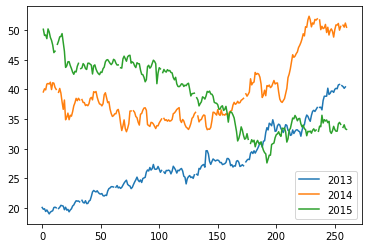

In [8]:
# Create dataframe prices here
prices = pd.DataFrame()
#yahoo = pd.read_csv('DATABASE/stock_data/yahoo.csv')

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

#### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.


We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the co_cities.csv file in a variable co.

- Inspect co using .info().
- Use .asfreq() to set the frequency to calendar daily.
- Show a plot of 'co' using subplots=True.
- Change the the frequency to monthly using the alias 'M'.
- Show another plot of co using subplots=True.

In [9]:
co = pd.read_csv('DATABASE/air_quality_data/co_cities.csv')
co

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761
...,...,...,...,...
1893,2010-12-27,0.510417,0.669384,0.414583
1894,2010-12-28,0.479166,0.669129,0.425278
1895,2010-12-29,0.460417,0.291757,0.400924
1896,2010-12-30,0.364772,0.101042,0.744792


In [10]:
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   object 
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB
None


In [11]:
co = co.set_index('date')
co

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
...,...,...,...
2010-12-27,0.510417,0.669384,0.414583
2010-12-28,0.479166,0.669129,0.425278
2010-12-29,0.460417,0.291757,0.400924


In [12]:
# Set the frequency to calendar daily
co.asfreq('D')


,Chicago,Los Angeles,New York
date,,,
2005-01-01,NaN,NaN,NaN
2005-01-02,NaN,NaN,NaN
2005-01-03,NaN,NaN,NaN
2005-01-04,NaN,NaN,NaN
2005-01-05,NaN,NaN,NaN
...,...,...,...
2010-12-27,NaN,NaN,NaN
2010-12-28,NaN,NaN,NaN
2010-12-29,NaN,NaN,NaN


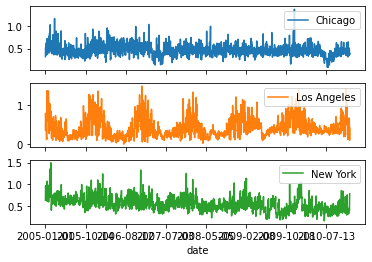

In [13]:



# Plot the data
co.plot(subplots = True)

plt.show()


In [14]:

# Set frequency to monthly
co.asfreq('M')


,Chicago,Los Angeles,New York
date,,,
2005-01-31,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN
2005-03-31,NaN,NaN,NaN
2005-04-30,NaN,NaN,NaN
2005-05-31,NaN,NaN,NaN
...,...,...,...
2010-08-31,NaN,NaN,NaN
2010-09-30,NaN,NaN,NaN
2010-10-31,NaN,NaN,NaN


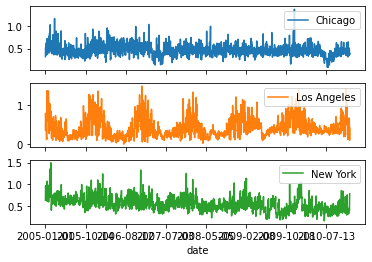

In [15]:

# Plot the data

co.plot(subplots = True)

plt.show()

### Lags, changes, and returns for stock price series


- `.shift()`: it allows to move all data into the past or future. Default = 1. +: Future; -: Past



In [16]:
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [17]:
google['shifted'] = google.Close.shift()
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [18]:
google['lagged'] = google.Close.shift(-1)
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


- `.div()`: it allows to divide a series by a value or an entire series. 

In [19]:
google['change'] = google.Close.div(google.shifted)
google

,Close,shifted,lagged,change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,NaN,0.992716
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN
2014-01-06,558.10,NaN,568.86,NaN
...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN
2016-12-27,791.55,NaN,785.05,NaN
2016-12-28,785.05,791.55,782.79,0.991788


Calculate one-period percent change

In [20]:
google['return'] = google.change.sub(1).mul(100) # obtaininng relative change in percentage 
google

,Close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN
...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174


- `.diff()`: diffeence in value for two periods

In [21]:
google['diff'] = google.Close.diff()
google

,Close,shifted,lagged,change,return,diff
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50


-`.pct_change()`: percent change for 2 periods

In [1]:
google['pct_change'] = google.Close.pct_change().mul(100)
google

NameError: name 'google' is not defined

Calculating datapoints in several dates appart 

In [23]:
google['return_2'] = google.Close.pct_change(periods = 2).mul(100)
google

,Close,shifted,lagged,change,return,diff,pct_change,return_2
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,-0.728417
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
...,...,...,...,...,...,...,...,...
2016-12-26,NaN,NaN,791.55,NaN,NaN,NaN,0.000000,0.000000
2016-12-27,791.55,NaN,785.05,NaN,NaN,NaN,0.207619,0.207619
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-6.50,-0.821174,-0.615260


#### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

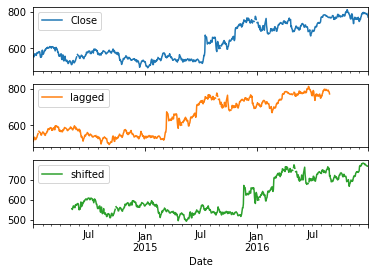

In [24]:
# Import data here
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot(subplots = True)
plt.show()

#### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().


We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

1. Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
2. Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
2. Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
4. Inspect the last five rows of yahoo to verify the calculation.
5. Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.


In [25]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [26]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

yahoo

,price,shifted_30,change_30,diff_30
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,NaN,NaN,NaN
2013-01-04,19.86,NaN,NaN,NaN
2013-01-07,19.40,NaN,NaN,NaN
2013-01-08,19.66,NaN,NaN,NaN
...,...,...,...,...
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18


In [27]:
# Inspect the last five rows of price
print(yahoo.tail())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [28]:
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

0.0    703
dtype: int64


#### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.


We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

1. Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
2. Plot the result using subplots=True.

In [29]:
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [30]:
google = google.asfreq('D')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [31]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)


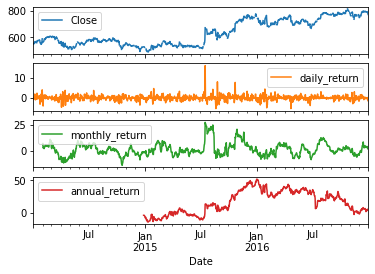

In [32]:
# Plot the result

google.plot(subplots = True)
plt.show()

### Compare time series growth rates

Una manera es la de **normalizar** los valores para que empiecen en 100. Dividiendo los precios por el primer valor en la serie y multiplicando por 100.
Como resultado el inicio es el 1 y luego va fluctuando.


In [33]:
google = pd.read_csv('DATABASE/stock_data/google.csv', parse_dates = ['Date'], index_col  ='Date')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [34]:
first_price = google.Close.iloc[0]
first_price

556.0

In [35]:
normalized = google.Close.div(first_price).mul(100)
normalized

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
                 ...    
2016-12-26           NaN
2016-12-27    142.365108
2016-12-28    141.196043
2016-12-29    140.789568
2016-12-30    138.816547
Name: Close, Length: 1094, dtype: float64

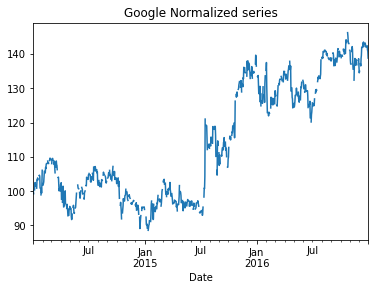

In [36]:
normalized.plot(title = 'Google Normalized series')
plt.show()

In [37]:
prices = pd.read_csv('DATABASE/stock_data/stock_data.csv', parse_dates = ['Date'], index_col  ='Date')
prices

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20


Normalizamos todos los datos

In [38]:
normalized = prices.div(prices.iloc[0])
normalized

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001963,0.991337,1.005900,1.000000,0.996292,1.017680,0.993453,0.997274,1.011111,1.015527,0.999299,1.001719
2010-01-06,0.985934,0.983888,0.987677,0.995604,0.999176,1.006818,1.054664,0.995327,1.010741,1.046582,0.988792,0.994328
2010-01-07,0.983971,0.974879,0.970874,0.989011,1.011949,1.026520,1.072668,0.988707,0.998519,1.046761,0.971979,0.986765
2010-01-08,0.990514,0.983541,0.997162,0.993407,1.016069,1.007107,1.085106,0.989097,1.001852,1.058362,0.965674,1.034204
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,3.811580,2.556306,5.680284,3.052747,3.229501,1.392246,4.214403,4.077492,1.237407,0.680350,0.321191,1.993297
2016-12-27,3.835787,2.570340,5.761016,3.076923,3.223321,1.395655,4.220622,4.080997,1.240370,0.684455,0.319790,1.996047
2016-12-28,3.819431,2.558385,5.766468,3.052747,3.181706,1.390398,4.187561,4.037383,1.224074,0.693735,0.316287,1.980062


In [39]:
#importamos el sp500
index = pd.read_csv('DATABASE/stock_data/index.csv', parse_dates = ['Date'], index_col  ='Date')

index = index.rename(columns = {'Unnamed: 1':'SP500'})
index

,SP500
Date,
2010-01-04,100.000000
2010-01-05,100.457394
2010-01-06,99.981005
2010-01-07,99.485328
2010-01-08,100.148231
...,...
2016-12-23,228.675001
2016-12-27,230.172669
2016-12-28,229.360223


In [40]:
prices = pd.concat([prices, index], axis = 1).dropna()
prices

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
Date,,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18,100.000000
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28,100.457394
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85,99.981005
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41,99.485328
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17,100.148231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97,228.675001
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13,230.172669
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20,229.360223


In [41]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
Date,,,,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.196271,99.133749,100.589993,100.000000,99.629172,101.767969,99.345336,99.727414,101.111111,101.552740,99.929947,100.171880,100.457394
2010-01-06,98.593392,98.388773,98.767737,99.560440,99.917594,100.681766,105.466448,99.532710,101.074074,104.658219,98.879159,99.432795,99.981005
2010-01-07,98.397121,97.487872,97.087379,98.901099,101.194891,102.651953,107.266776,98.870717,99.851852,104.676066,97.197898,98.676521,99.485328
2010-01-08,99.051358,98.354123,99.716206,99.340659,101.606922,100.710654,108.510638,98.909657,100.185185,105.836159,96.567426,103.420419,100.148231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,381.157998,255.630631,568.028379,305.274725,322.950144,139.224636,421.440262,407.749221,123.740741,68.034981,32.119089,199.329667,228.675001
2016-12-27,383.578672,257.033957,576.101568,307.692308,322.332097,139.565519,422.062193,408.099688,124.037037,68.445476,31.978984,199.604675,230.172669
2016-12-28,381.943081,255.838531,576.646751,305.274725,318.170581,139.039750,418.756137,403.738318,122.407407,69.373550,31.628722,198.006188,229.360223


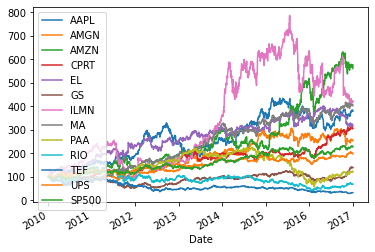

In [42]:
normalized.plot()
plt.show()

#### Compare the performance of several asset classes
You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, then assign the result to prices.
- Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
- Divide prices by first_prices, multiply by 100 and assign the result to normalized.
- Plot normalized.



In [43]:
# Import data here
prices = pd.read_csv('DATABASE/stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


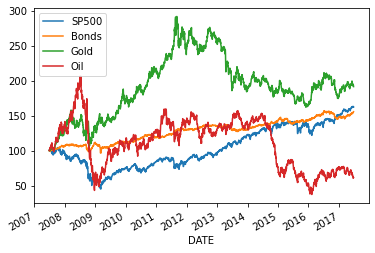

In [44]:
# Select first prices
first_prices = prices.iloc[0]

# Create normalized_prices
normalized = prices.div(first_prices).mul(100)

# Plot normalized_prices
normalized.plot()
plt.show()

#### Comparing stock prices with a benchmark
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.
- Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
- Divide data by the first value for each series, multiply by 100 and plot the result.

In [45]:
# Import stock prices and index here
stocks = pd.read_csv('DATABASE/stock_data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('DATABASE/stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


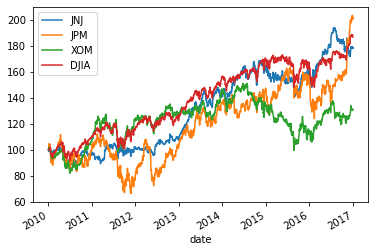

In [46]:
# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

#### Plot performance difference vs benchmark index
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.


We have already imported pandas as pd and matplotlib.pyplot as plt.

- Create the list tickers containing the two stock symbols.
- Use pd.read_csv() to import 'msft_aapl.csv' and 'sp500.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and sp500, respectively.
- Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, and assign the result to data.
- Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized.
- Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes, then plot the result.

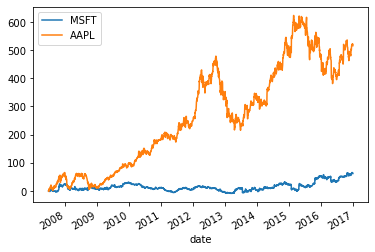

In [47]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('DATABASE/stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('DATABASE/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Changing the time series frequency: resampling

#### Convert monthly to weekly data
You have learned in the video how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

We have already imported pandas as pd for you. We have also defined start and end dates.

- Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
- Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index.
- Create weekly_dates using pd.date_range with start, end and frequency alias 'W'.
- Apply .reindex() to monthly three times: first without additional options, then with bfill and then with ffill, print()-ing each result.


In [48]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [49]:

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
# 

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [50]:
print(monthly.reindex(weekly_dates, method='bfill'))


2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [51]:
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


#### Create weekly from monthly unemployment data
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Use pd.read_csv() to import 'unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data.
- Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first five rows.
- Convert again to weekly frequency, adding the option 'bfill' and show the first five rows.
- Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first five rows.
- Plot weekly_ffill starting in 2015.

In [52]:
# Import data here
data = pd.read_csv('DATABASE/stock_data/unrate.csv', parse_dates=['DATE'], index_col='DATE')

# Show first five rows of weekly series
print(data.asfreq('W').head())



            UNRATE
DATE              
2010-01-03     NaN
2010-01-10     NaN
2010-01-17     NaN
2010-01-24     NaN
2010-01-31     NaN


In [53]:

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())


            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


In [54]:

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())


            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


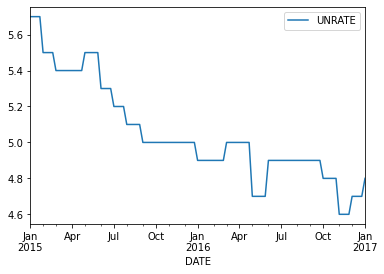

In [55]:

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

### Upsampling & interpolation with .resample()


- `.resample()`: acts as `.groupby()`, where groups data within ersampling period and applies one or several methods to each group. 
Using **upsampling** whern filling from existingor interpolating values. 
Using **downsampling** when aggregating to existing data.

Options: 

1. 'M': calendar month end
2. 'MS': calendar month start
3. 'BM': business month end
4. 'BMS': business month start


Filling: 

1. `.ffil()` forward fill, to fill the gaps
2. `.interpolate()`: finds points on straight line between existing data 



#### Use interpolation to create weekly employment data
You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate() method that you learned about in this video.



In [56]:
monthly = pd.read_csv('DATABASE/stock_data/unrate.csv', parse_dates=['DATE'], index_col='DATE')
monthly

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
...,...
2016-09-01,4.9
2016-10-01,4.8
2016-11-01,4.6


Inspect monthly using .info().


In [57]:
# Inspect data here
print(monthly.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


In [58]:

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')


# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

In [59]:

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

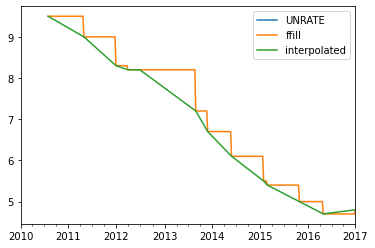

In [60]:
# Plot weekly
weekly.plot()
plt.show()

**Interpolating is a useful way to create smoother time series when resampling.**


#### Interpolate debt/GDP and compare to unemployment
Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [61]:
data = pd.read_csv('DATABASE/stock_data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
data

,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6
...,...,...
2017-01-01,104.30607,4.8
2017-02-01,NaN,4.7
2017-03-01,NaN,4.5


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


In [63]:
# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


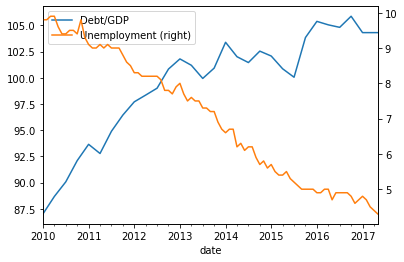

In [64]:
# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');
plt.show()


### Downsampling & aggregation

#### Compare weekly, monthly and annual ozone trends for NYC & LA
You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

In [65]:
# Import and inspect data here
ozone = pd.read_csv('DATABASE/air_quality_data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
ozone

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754
...,...,...
2017-03-27,NaN,0.005640
2017-03-28,NaN,0.013870
2017-03-29,NaN,0.034341


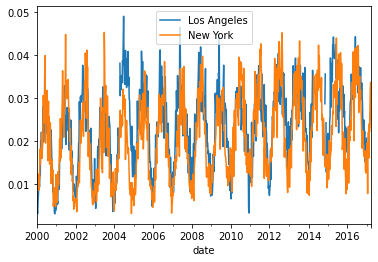

In [66]:
# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot();
plt.show()

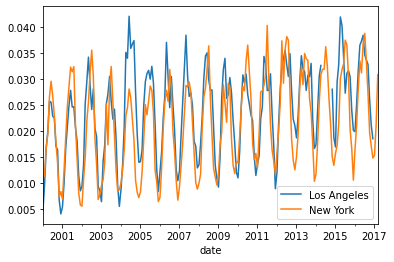

In [67]:
# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot();
plt.show();

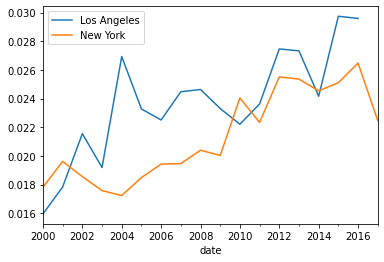

In [68]:
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot();
plt.show();


#### Compare monthly average stock prices for Facebook and Google
Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.Ç

In [69]:
stocks = pd.read_csv('DATABASE/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')
stocks

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20


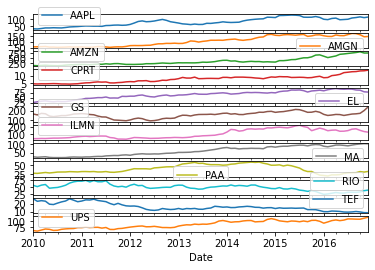

In [70]:
# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show();


#### Compare quarterly GDP growth rate and stock returns
With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

In [71]:
gdp_growth = pd.read_csv('DATABASE/stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [72]:
# Import and inspect djia here
djia = pd.read_csv('DATABASE/stock_data/djia.csv', parse_dates=['date'], index_col='date')
djia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


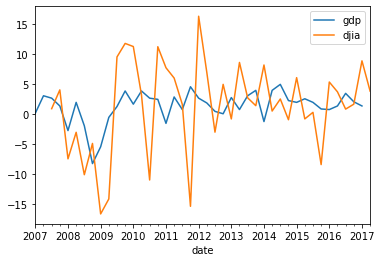

In [73]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show();


**Awesome! Do you think there's a relationship between GDP and the Dow Jones?**

#### Visualize monthly mean, median and standard deviation of S&P500 returns
You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

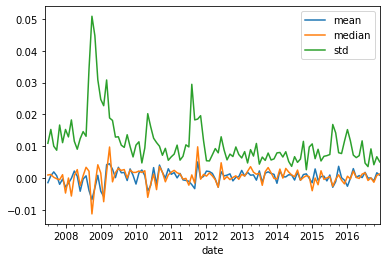

In [74]:
# Import data here
sp500 = pd.read_csv('DATABASE/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show();


## Window Functions: Rolling & Expanding Metrics
### Rolling window functions with pandas


Windows function allow you to operate over sub periods in your time series, and also to calculate metrics for sub periods inside the windo, which teh aggreation creates a new time series in which each data point is a summary of various original data points. 

1. Rolling: same size, sliding data points. `window = number`. MIn_periods: choose value <30 to get results for first days. 
2. Expanding: contain all prior values 

#### Rolling average air quality since 2010 for new york city
The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [75]:
# Import and inspect ozone data here
data = pd.read_csv('DATABASE/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


In [76]:
# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

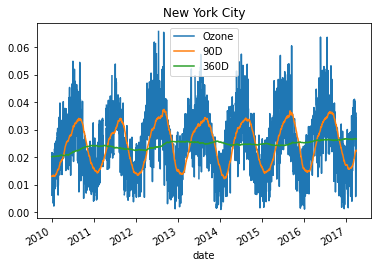

In [77]:
# Plot data
data['2010':].plot(title='New York City')
plt.show()

#### Rolling 360-day median & std. deviation for nyc ozone data since 2000
The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

In [78]:
# Import and inspect ozone data here
data = pd.read_csv('DATABASE/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()


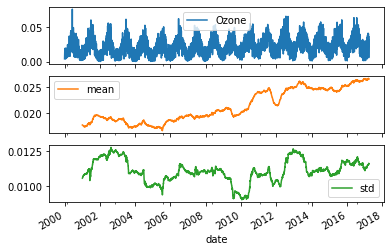

In [79]:
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);
plt.show()

#### Rolling quantiles for daily air quality in nyc
You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [80]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


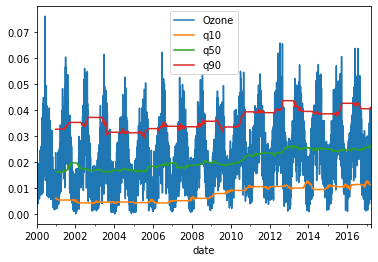

In [81]:
# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()


**The rolling quantiles help show the volatility of the series.**
### Expanding window functions with pandas

- `.expanding()`: acts like `.rolling()`.
- `.cumsum()`, `.cumprod()`, `.cummin()`, `.max()`

How to run rate of return in practice:

In [82]:
pr = pd.read_csv('DATABASE/stock_data/sp500.csv', parse_dates=['date'], index_col='date').pct_change()
pr

,SP500
date,
2007-06-29,NaN
2007-07-02,0.010696
2007-07-03,0.003580
2007-07-05,0.000348
2007-07-06,0.003304
...,...
2016-12-23,0.001252
2016-12-27,0.002248
2016-12-28,-0.008357


In [83]:
pr_plus_one = pr.add(1)
pr_plus_one

,SP500
date,
2007-06-29,NaN
2007-07-02,1.010696
2007-07-03,1.003580
2007-07-05,1.000348
2007-07-06,1.003304
...,...
2016-12-23,1.001252
2016-12-27,1.002248
2016-12-28,0.991643


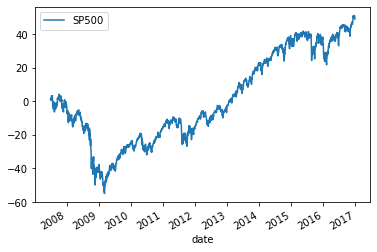

In [84]:
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()
plt.show()

In [85]:
from ANALYSIS.f_functions.multi_period_return import *

#### Cumulative sum vs .diff()
In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [86]:
data = pd.read_csv('DATABASE/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
data

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


In [87]:
# Calculate differences
differences = data.diff().dropna()


In [88]:
# Select start price
start_price = data.first('D')

In [89]:
# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

In [90]:
# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

True


**The .cumsum() method allows you to reconstruct the original data from the differences.**

#### Cumulative return on 1,000 invested in google vs apple I
To put your new ability to do cumulative return calculations to practical use, let's compare how much 1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

In [91]:
data = pd.read_csv('DATABASE/stock_data/apple_google.csv', parse_dates=['Date'], index_col='Date')

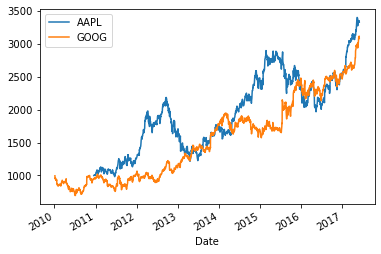

In [92]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();

#### Cumulative return on $1,000 invested in google vs apple II
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

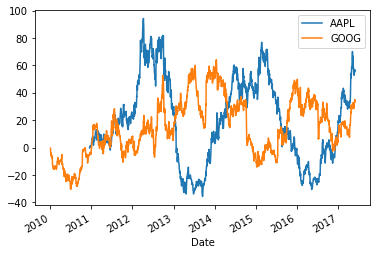

In [93]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

### Case study: S&P500 price simulation


In [94]:
from numpy.random import normal, seed 
from scipy.stats import norm
import seaborn as sns
seed(42)



Sacamos una campana de valores aleatorios en formato de campana de gauss de 1000 observaciones 

/home/bluetab/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

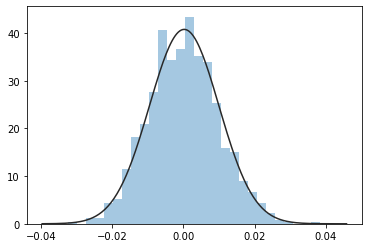

In [95]:

random_returns = normal(loc = 0, scale = 0.01, size = 1000)

sns.distplot(random_returns, fit = norm, kde = False)

Ahora, usamos estos 1000 valores aleatorios de numpyu para crear un 'price path'

<AxesSubplot:>

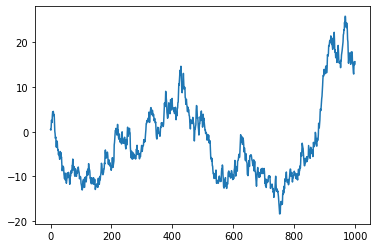

In [96]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

Ahora que pasa con el SP500¿?

In [97]:
data = pd.read_csv('DATABASE/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
data

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


In [98]:
data['returns'] = data.SP500.pct_change()
data

,SP500,returns
date,,
2007-06-29,1503.35,NaN
2007-07-02,1519.43,0.010696
2007-07-03,1524.87,0.003580
2007-07-05,1525.40,0.000348
2007-07-06,1530.44,0.003304
...,...,...
2016-12-23,2263.79,0.001252
2016-12-27,2268.88,0.002248
2016-12-28,2249.92,-0.008357


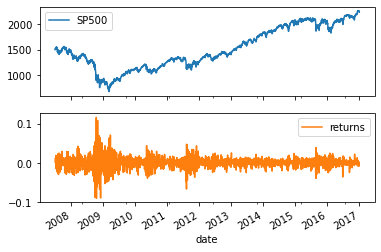

In [99]:
data.plot(subplots = True)
plt.show()

Mas o menos con el return vemos que a diario proporciona una rentabilidad del 3% quitando el outlier de la crisis del 2008 que da otras rentabilidades

¿Y si comparamos las distribuciones de los valores aleatorios con la de SP500?

/home/bluetab/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='returns', ylabel='Density'>

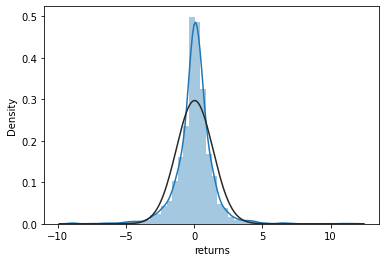

In [100]:
sns.distplot(data.returns.dropna().mul(100), fit = norm)


Esto muestra que las formas no casa muy bien. Esto es normal, el SP500 debe tener unos outliers que la distribución normal no tiene. Pero, y si seleccionamos del SP500 de manera aleatoria?¿ 

In [101]:
from numpy.random import choice 

#1. Sacamos los valores que vamos a utilizar ocmo muestra

sample = data.returns.dropna()

#2. CUanto son? los contamos

n_obs = data.returns.count()


In [102]:

#3. EL choice devuelve un array con unos valores seleccionados aleatoriamente
random_walk = choice(sample, size = n_obs)
random_walk = pd.Series(random_walk, index = sample.index)
random_walk.head()

date
2007-07-02    0.005007
2007-07-03    0.040729
2007-07-05   -0.000322
2007-07-06   -0.008404
2007-07-09    0.002119
dtype: float64

In [103]:
start = data.SP500.first('D')
start

date
2007-06-29    1503.35
Name: SP500, dtype: float64

In [104]:
sp500_random = start.append(random_walk.add(1))
sp500_random

date
2007-06-29    1503.350000
2007-07-02       1.005007
2007-07-03       1.040729
2007-07-05       0.999678
2007-07-06       0.991596
                 ...     
2016-12-23       1.004895
2016-12-27       0.984949
2016-12-28       0.999290
2016-12-29       1.000017
2016-12-30       1.006095
Length: 2395, dtype: float64

Ahora estamos preparados para calcular el *cumulative return*

In [105]:
data['SP500_random'] = sp500_random.cumprod().sub(1)
data

,SP500,returns,SP500_random
date,,,
2007-06-29,1503.35,NaN,1502.350000
2007-07-02,1519.43,0.010696,1509.877402
2007-07-03,1524.87,0.003580,1571.413359
2007-07-05,1525.40,0.000348,1570.907656
2007-07-06,1530.44,0.003304,1557.697515
...,...,...,...
2016-12-23,2263.79,0.001252,3410.354989
2016-12-27,2268.88,0.002248,3359.009564
2016-12-28,2249.92,-0.008357,3356.623507


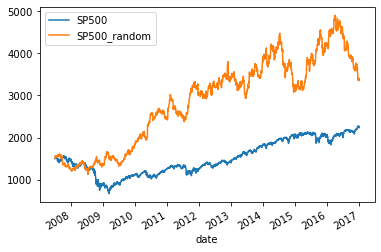

In [106]:
data[['SP500', 'SP500_random']].plot()
plt.show()

#### Random walk I
In the last video, you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.

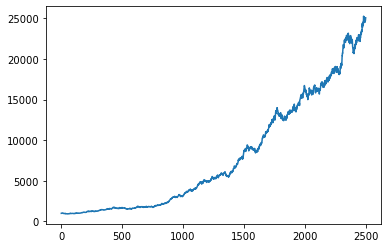

In [107]:
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();


#### Random walk II
In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [108]:
fb = pd.read_csv('DATABASE/stock_data/fb.csv', header = None)
fb = fb.rename(columns = {0: 'date', 1: 'fb'})
fb.date = pd.to_datetime(fb.date)
fb = fb.set_index('date')
fb

,fb
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00
...,...
2017-05-24,150.04
2017-05-25,151.96
2017-05-26,152.13


In [109]:
# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()




In [110]:
daily_returns

date
2012-05-18    0.006053
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
                ...   
2017-05-24    0.013305
2017-05-25    0.012797
2017-05-26    0.001119
2017-05-30    0.001643
2017-05-31   -0.006038
Name: fb, Length: 1266, dtype: float64

In [111]:
# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk, index = daily_returns.index)
random_walk

date
2012-05-18    0.016946
2012-05-21   -0.014928
2012-05-22   -0.033104
2012-05-23   -0.005080
2012-05-24    0.004367
                ...   
2017-05-24    0.019531
2017-05-25    0.001272
2017-05-26   -0.000904
2017-05-30    0.000469
2017-05-31    0.004592
Length: 1266, dtype: float64

/home/bluetab/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


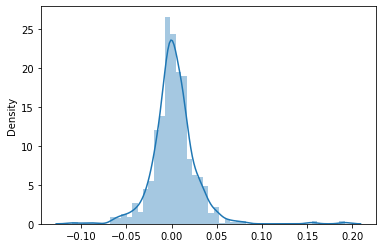

In [112]:

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show();

#### Random walk III
In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

In [113]:
# Select fb start price here
start = fb.fb.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)
random_price


date
2012-05-17    38.000000
2012-05-18     1.016946
2012-05-21     0.985072
2012-05-22     0.966896
2012-05-23     0.994920
                ...    
2017-05-24     1.019531
2017-05-25     1.001272
2017-05-26     0.999096
2017-05-30     1.000469
2017-05-31     1.004592
Length: 1267, dtype: float64

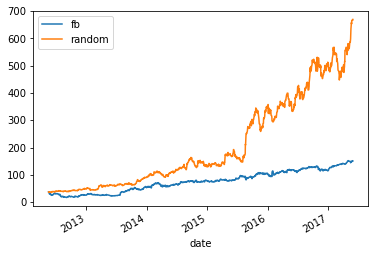

In [114]:
# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()


**Esta vez aunque sea random... tiene un cierto movimiento parecido a los stocks de facebook ...**

### Relationships between time series: correlation


La correlacion mide **LA RELACION LINEAL**. EL coeficiente d ela correlación nos muestra **cuanto de probable es que se muevean dos variables sobre sus medias**. 


In [115]:
data = pd.read_csv('DATABASE/stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
data.dropna().info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [116]:
data

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80
...,...,...,...,...
2017-06-20,2437.03,621.84,1246.50,43.34
2017-06-21,2435.61,622.94,1247.05,42.48
2017-06-22,2434.50,622.93,1251.40,42.53


Vemos su relacion lineal, mediante el jointplot 

In [117]:
daily_returns = data.pct_change()
daily_returns

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,NaN,NaN,NaN,NaN
2007-07-02,0.010696,0.002014,0.003084,0.009082
2007-07-03,0.003580,-0.002333,0.010377,0.004219
2007-07-05,0.000348,-0.004652,-0.002054,0.005601
2007-07-06,0.003304,-0.002099,-0.012426,0.013786
...,...,...,...,...
2017-06-20,-0.006697,0.004393,-0.003677,-0.020344
2017-06-21,-0.000583,0.001769,0.000441,-0.019843
2017-06-22,-0.000456,-0.000016,0.003488,0.001177


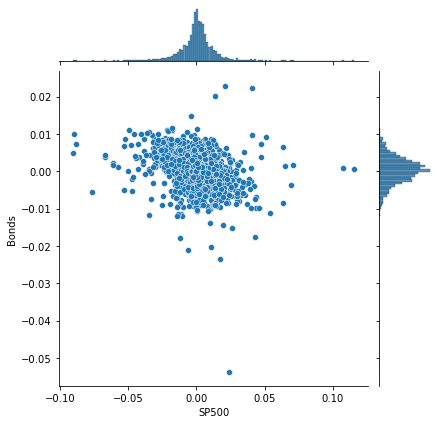

In [118]:
sns.jointplot(x = 'SP500', y = 'Bonds', data = daily_returns);

El SP500 y los Bonds, no tienen mucha correlación la verdad por no decir que casi no tienen. 

¿Cómo calculamos todas las correlaciones?

In [119]:
correlations = daily_returns.corr()
correlations

,SP500,Bonds,Gold,Oil
SP500,1.000000,-0.314890,-0.006546,0.335353
Bonds,-0.314890,1.000000,0.028882,-0.215279
Gold,-0.006546,0.028882,1.000000,0.104272
Oil,0.335353,-0.215279,0.104272,1.000000


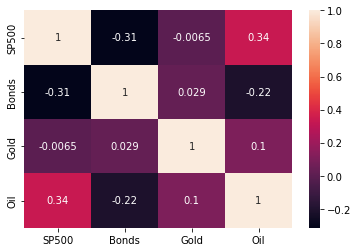

In [120]:
sns.heatmap(correlations, annot = True);

#### Annual return correlations among several stocks
You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [121]:
data = pd.read_csv('DATABASE/stock_data/5_stocks.csv', parse_dates=['Date'], index_col='Date')
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3999 entries, 2001-07-06 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3999 non-null   float64
 1   AMZN    3999 non-null   float64
 2   IBM     3999 non-null   float64
 3   WMT     3999 non-null   float64
 4   XOM     3999 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


In [122]:
# Calculate year-end prices here
annual_prices = data.resample('A').last()
annual_prices

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,1.56,10.82,120.96,57.55,39.30
2002-12-31,1.02,18.89,77.50,50.51,34.94
2003-12-31,1.53,52.62,92.68,53.05,41.00
2004-12-31,4.60,44.29,98.58,52.82,51.26
2005-12-31,10.27,47.15,82.20,46.80,56.17
2006-12-31,12.12,39.46,97.15,46.18,76.63
2007-12-31,28.30,92.64,108.10,47.53,93.69
2008-12-31,12.19,51.28,84.16,56.06,79.83
2009-12-31,30.10,134.52,130.90,53.45,68.19


In [123]:

# Calculate annual returns here
annual_returns = annual_prices.pct_change()
annual_returns

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN
2002-12-31,-0.346154,0.745841,-0.359292,-0.122328,-0.110941
2003-12-31,0.500000,1.785601,0.195871,0.050287,0.173440
2004-12-31,2.006536,-0.158305,0.063660,-0.004336,0.250244
2005-12-31,1.232609,0.064574,-0.166159,-0.113972,0.095786
2006-12-31,0.180136,-0.163097,0.181873,-0.013248,0.364251
2007-12-31,1.334983,1.347694,0.112712,0.029233,0.222628
2008-12-31,-0.569258,-0.446459,-0.221462,0.179466,-0.147935
2009-12-31,1.469237,1.623245,0.555371,-0.046557,-0.145810


In [124]:
# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


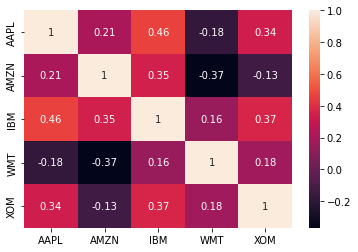

In [125]:
# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show();


## Putting it all together: Building a value-weighted index
### Select index components & import data


Se va a construir un indice compuesto por varios valores de mercado, cada componente se va a pesar por su capitalización del mercado. 

Se basan en esto los: SP500, NASDAQ, Wildshire 5000, Hang Seng

- Capitalización mercado = share price * number of shares 

Procedimiento: 

1. Seleccionar las compañias mas grandesde un listado
2. Calcular el numero de acciones y su matching stock price
3. Calcular el peso de los componentes 
4. Calcular el índice para el periodo
5. Medir su performance

1. Seleccionar las compañias mas grandesde un listado

In [126]:
nyse = pd.read_excel('DATABASE/stock_data/listings.xlsx', sheet_name = 'nyse', na_values = 'n/a')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


/home/bluetab/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [127]:
nyse

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals


1.1 Load & prepare listing data

In [128]:
nyse.set_index('Stock Symbol', inplace = True)


In [129]:
nyse

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...
ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants


Vamos a seleccionar las empresass mas grandes, entonces, las que no tiene sector asociado las borramos

In [130]:
try: 
    nyse.dropna(subset = ['Sector'], inplace = True)
except:
    print('NO HACE BIEN EL DROPNA')

In [131]:
nyse['Market Capitalization'] /= 1e6

1.2 Seleccionamos las compañias más grandes 

In [132]:
components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending = False)

Sector                 Stock Symbol
Health Care            JNJ             338834.390080
Energy                 XOM             338728.713874
Finance                JPM             300283.250479
Miscellaneous          BABA            275525.000000
Public Utilities       T               247339.517272
Basic Industries       PG              230159.644117
Consumer Services      WMT             221864.614129
Consumer Non-Durables  KO              183655.305119
Technology             ORCL            181046.096000
Capital Goods          TM              155660.252483
Transportation         UPS              90180.886756
Consumer Durables      ABB              48398.935676
Name: Market Capitalization, dtype: float64

In [133]:
tickers = components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [134]:
tickers.tolist()

['PG',
 'TM',
 'ABB',
 'KO',
 'WMT',
 'XOM',
 'JPM',
 'JNJ',
 'BABA',
 'T',
 'ORCL',
 'UPS']

1.3 Seleccionamos estas compañias del dataframe original 

In [135]:
columns = ['Company Name','Last Sale', 'Market Capitalization']

component_info = nyse.loc[tickers, columns]

pd.options.display.float_format = '{:,.2f}'.format

In [136]:
component_info

,Company Name,Last Sale,Market Capitalization
Stock Symbol,,,
PG,Procter & Gamble Company (The),90.03,"230,159.64"
TM,Toyota Motor Corp Ltd Ord,104.18,"155,660.25"
ABB,ABB Ltd,22.63,"48,398.94"
KO,Coca-Cola Company (The),42.79,"183,655.31"
WMT,"Wal-Mart Stores, Inc.",73.15,"221,864.61"
XOM,Exxon Mobil Corporation,81.69,"338,728.71"
JPM,J P Morgan Chase & Co,84.40,"300,283.25"
JNJ,Johnson & Johnson,124.99,"338,834.39"
BABA,Alibaba Group Holding Limited,110.21,"275,525.00"


#### Explore and clean company listing information
To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.

In [137]:
nyse = pd.read_excel('DATABASE/stock_data/listings.xlsx', sheet_name = 'nyse', na_values = 'n/a')
nyse

/home/bluetab/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16","2,013.00",Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,"332,556,067.14","2,014.00",Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,"26,105,442,923.70","2,013.00",Health Care,Major Pharmaceuticals


In [138]:
nyse.set_index('Stock Symbol', inplace = True)
nyse.dropna(subset = ['Sector'], inplace = True)
nyse['Market Capitalization'] /= 1e6
components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending = False)
components

Sector                 Stock Symbol
Basic Industries       PG             230,159.64
Capital Goods          TM             155,660.25
Consumer Durables      ABB             48,398.94
Consumer Non-Durables  KO             183,655.31
Consumer Services      WMT            221,864.61
Energy                 XOM            338,728.71
Finance                JPM            300,283.25
Health Care            JNJ            338,834.39
Miscellaneous          BABA           275,525.00
Public Utilities       T              247,339.52
Technology             ORCL           181,046.10
Transportation         UPS             90,180.89
Name: Market Capitalization, dtype: float64

#### Select and inspect index components
Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [139]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [140]:
# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(nyse.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

                                Company Name  Market Capitalization  Last Sale
Stock Symbol                                                                  
JNJ                        Johnson & Johnson             338,834.39     124.99
XOM                  Exxon Mobil Corporation             338,728.71      81.69
JPM                    J P Morgan Chase & Co             300,283.25      84.40
BABA           Alibaba Group Holding Limited             275,525.00     110.21
T                                  AT&T Inc.             247,339.52      40.28
PG            Procter & Gamble Company (The)             230,159.64      90.03
WMT                    Wal-Mart Stores, Inc.             221,864.61      73.15
KO                   Coca-Cola Company (The)             183,655.31      42.79
ORCL                      Oracle Corporation             181,046.10      44.00
TM                 Toyota Motor Corp Ltd Ord             155,660.25     104.18
UPS              United Parcel Service, Inc.        

#### Import index component price information
Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [141]:
stock_prices = pd.read_csv('DATABASE/stock_data/stock_data.csv',
                           parse_dates=['Date'],
                           index_col='Date')
stock_prices

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20


In [142]:
# Calculate the returns
price_return = stock_prices.iloc[-1]\
.div(stock_prices.iloc[0])\
.sub(1)\
.mul(100)


price_return

AAPL   278.87
AMGN   153.31
AMZN   460.02
CPRT   204.40
EL     215.16
GS      38.35
ILMN   319.12
MA     302.06
PAA     19.59
RIO    -31.36
TEF    -67.78
UPS     97.04
dtype: float64

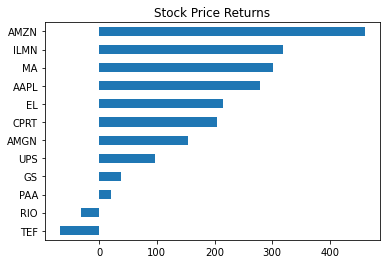

In [143]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()


### Build a market-cap weighted index

Key inputs for aggregate Market Value per Period

1. Acciones
2. Stock price series

Then, normalize index to start at 100











#### Calculate number of shares outstanding
The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [144]:
nyse = pd.read_excel('DATABASE/stock_data/listings.xlsx',
                     sheet_name = 'nyse', 
                     na_values = 'n/a')

nyse

/home/bluetab/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16","2,013.00",Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,"332,556,067.14","2,014.00",Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,"26,105,442,923.70","2,013.00",Health Care,Major Pharmaceuticals


In [145]:
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [147]:
nyse

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16","2,013.00",Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,"332,556,067.14","2,014.00",Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,"26,105,442,923.70","2,013.00",Health Care,Major Pharmaceuticals


In [148]:
# Select components and relevant columns from listings
components = nyse\
.set_index('Stock Symbol')\
.loc[tickers.to_list(), ['Market Capitalization', 'Last Sale']]
# Print the first rows of components
print(components.head())

              Market Capitalization  Last Sale
Stock Symbol                                  
PG               230,159,644,116.60      90.03
TM               155,660,252,483.14     104.18
ABB               48,398,935,676.05      22.63
KO               183,655,305,119.11      42.79
WMT              221,864,614,128.85      73.15


In [149]:
# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

Stock Symbol
T      6,140,504,401.00
KO     4,292,014,609.00
XOM    4,146,513,819.00
ORCL   4,114,684,000.00
JPM    3,557,858,418.00
WMT    3,033,009,079.00
JNJ    2,710,891,992.00
PG     2,556,477,220.00
BABA   2,500,000,000.00
ABB    2,138,706,835.00
TM     1,494,147,173.00
UPS      869,297,154.00
dtype: float64


In [150]:
no_shares = pd.DataFrame(no_shares)\
.rename(columns = {0:'Number of Shares'})

no_shares

,Number of Shares
Stock Symbol,
PG,"2,556,477,220.00"
TM,"1,494,147,173.00"
ABB,"2,138,706,835.00"
KO,"4,292,014,609.00"
WMT,"3,033,009,079.00"
XOM,"4,146,513,819.00"
JPM,"3,557,858,418.00"
JNJ,"2,710,891,992.00"
BABA,"2,500,000,000.00"


#### Create time series of market value
You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [151]:
# Select the number of shares
no_shares = no_shares['Number of Shares']
print(no_shares.sort_values())


Stock Symbol
UPS      869,297,154.00
TM     1,494,147,173.00
ABB    2,138,706,835.00
BABA   2,500,000,000.00
PG     2,556,477,220.00
JNJ    2,710,891,992.00
WMT    3,033,009,079.00
JPM    3,557,858,418.00
ORCL   4,114,684,000.00
XOM    4,146,513,819.00
KO     4,292,014,609.00
T      6,140,504,401.00
Name: Number of Shares, dtype: float64


In [152]:

# Create the series of market cap per ticker
market_cap = stock_prices\
.mul(no_shares)\
.fillna(0)


market_cap

,AAPL,ABB,AMGN,AMZN,BABA,CPRT,EL,GS,ILMN,JNJ,...,ORCL,PAA,PG,RIO,T,TEF,TM,UPS,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"50,575,708,419.72",0.00,0.00
2010-01-05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"50,662,638,135.12",0.00,0.00
2010-01-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"50,288,840,358.90",0.00,0.00
2010-01-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"49,906,349,611.14",0.00,0.00
2010-01-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"52,305,609,756.18",0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,812,390,949.38",0.00,0.00
2016-12-27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,951,478,494.02",0.00,0.00
2016-12-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,143,032,140.80",0.00,0.00


In [153]:
# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

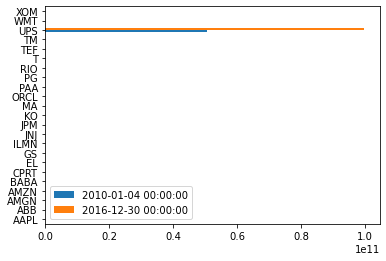

In [154]:
# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

#### Calculate & plot the composite index
By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [155]:
# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1)
print(raw_index)

Date
2010-01-04    50,575,708,419.72
2010-01-05    50,662,638,135.12
2010-01-06    50,288,840,358.90
2010-01-07    49,906,349,611.14
2010-01-08    52,305,609,756.18
                    ...        
2016-12-23   100,812,390,949.38
2016-12-27   100,951,478,494.02
2016-12-28   100,143,032,140.80
2016-12-29    99,951,786,766.92
2016-12-30    99,656,225,734.56
Length: 1762, dtype: float64


In [156]:
# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

Date
2010-01-04   100.00
2010-01-05   100.17
2010-01-06    99.43
2010-01-07    98.68
2010-01-08   103.42
              ...  
2016-12-23   199.33
2016-12-27   199.60
2016-12-28   198.01
2016-12-29   197.63
2016-12-30   197.04
Length: 1762, dtype: float64


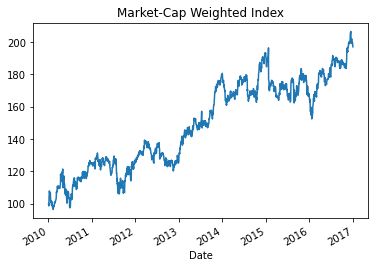

In [157]:
# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

### Evaluate index performance
#### Calculate the contribution of each stock to the index
You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.




In [158]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

97.04365761430043


In [159]:
# Select the market capitalization
market_cap = components['Market Capitalization']
market_cap

Stock Symbol
PG     230,159,644,116.60
TM     155,660,252,483.14
ABB     48,398,935,676.05
KO     183,655,305,119.11
WMT    221,864,614,128.85
XOM    338,728,713,874.11
JPM    300,283,250,479.20
JNJ    338,834,390,080.08
BABA   275,525,000,000.00
T      247,339,517,272.28
ORCL   181,046,096,000.00
UPS     90,180,886,755.96
Name: Market Capitalization, dtype: float64

In [160]:
# Calculate the total market cap
total_market_cap = market_cap.sum()


In [161]:
# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())


Stock Symbol
ABB    0.02
UPS    0.03
TM     0.06
ORCL   0.07
KO     0.07
WMT    0.08
PG     0.09
T      0.09
BABA   0.11
JPM    0.11
XOM    0.13
JNJ    0.13
Name: Market Capitalization, dtype: float64


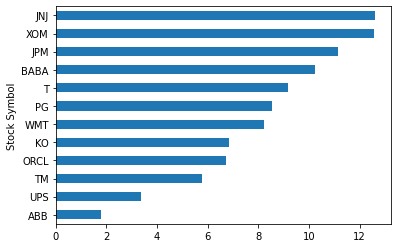

In [162]:
# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

**The next step is to take a look at how your index stacks up against a benchmark!**

#### Compare index performance against benchmark I
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [163]:
# Convert index series to dataframe here
data = index.to_frame('Index')
data



,Index
Date,
2010-01-04,100.00
2010-01-05,100.17
2010-01-06,99.43
2010-01-07,98.68
2010-01-08,103.42
...,...
2016-12-23,199.33
2016-12-27,199.60
2016-12-28,198.01


In [164]:
# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia
data

,Index,DJIA
Date,,
2010-01-04,100.00,78.93
2010-01-05,100.17,78.84
2010-01-06,99.43,78.86
2010-01-07,98.68,79.10
2010-01-08,103.42,79.19
...,...,...
2016-12-23,199.33,148.66
2016-12-27,199.60,148.75
2016-12-28,198.01,147.92


In [165]:

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))


Index   97.04
DJIA    86.72
dtype: float64


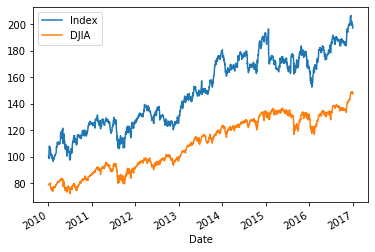

In [166]:

# Plot both series
data.plot()
plt.show()

**Conclusión, es mejor invertir en el índice que acabamos de crear que en todo el conjunto del SP500.**

#### Compare index performance against benchmark II
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [167]:
# Inspect data
print(data.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None


In [168]:
print(data.head())

            Index  DJIA
Date                   
2010-01-04 100.00 78.93
2010-01-05 100.17 78.84
2010-01-06  99.43 78.86
2010-01-07  98.68 79.10
2010-01-08 103.42 79.19


In [169]:
from ANALYSIS.f_functions.multi_period_return import *

In [170]:
# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)



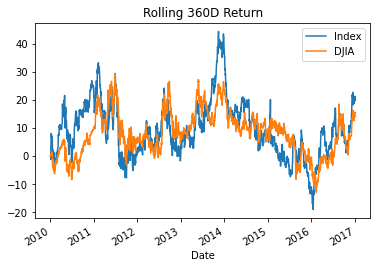

In [171]:
# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

**Conclusión, es mejor invertir en el índice que acabamos de crear que en todo el conjunto del SP500.**

### Index correlation & exporting to Excel


#### Visualize your index constituent correlations
To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

In [174]:
# Inspect stock_prices here
print(stock_prices.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [175]:
# Calculate the daily returns
returns = stock_prices.pct_change()

In [176]:
# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

      AAPL  AMGN  AMZN  CPRT   EL   GS  ILMN   MA  PAA  RIO  TEF  UPS
AAPL  1.00  0.29  0.33  0.35 0.31 0.34  0.26 0.39 0.21 0.36 0.33 0.37
AMGN  0.29  1.00  0.32  0.36 0.35 0.39  0.34 0.40 0.23 0.31 0.37 0.43
AMZN  0.33  0.32  1.00  0.30 0.33 0.33  0.24 0.43 0.18 0.33 0.33 0.38
CPRT  0.35  0.36  0.30  1.00 0.37 0.42  0.27 0.40 0.22 0.38 0.38 0.46
EL    0.31  0.35  0.33  0.37 1.00 0.36  0.21 0.43 0.21 0.42 0.43 0.46
GS    0.34  0.39  0.33  0.42 0.36 1.00  0.27 0.47 0.27 0.53 0.50 0.51
ILMN  0.26  0.34  0.24  0.27 0.21 0.27  1.00 0.30 0.16 0.23 0.23 0.27
MA    0.39  0.40  0.43  0.40 0.43 0.47  0.30 1.00 0.24 0.44 0.45 0.49
PAA   0.21  0.23  0.18  0.22 0.21 0.27  0.16 0.24 1.00 0.34 0.25 0.22
RIO   0.36  0.31  0.33  0.38 0.42 0.53  0.23 0.44 0.34 1.00 0.56 0.51
TEF   0.33  0.37  0.33  0.38 0.43 0.50  0.23 0.45 0.25 0.56 1.00 0.52
UPS   0.37  0.43  0.38  0.46 0.46 0.51  0.27 0.49 0.22 0.51 0.52 1.00


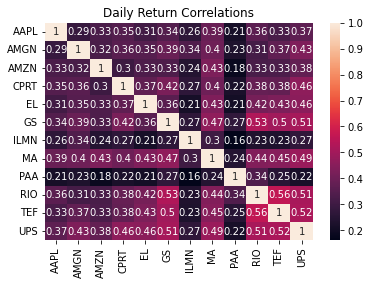

In [177]:

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show();

#### Save your analysis to multiple excel worksheets
Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.

In [180]:
index = pd.DataFrame(index)

In [182]:
# Inspect index and stock_prices
print(index.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None


In [183]:
print(stock_prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [184]:

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  0       1762 non-null   float64
dtypes: float64(13)
memory usage: 192.7 KB
None


In [ ]:
import os


if 'Escritorio' in os.listdir():
    
    os.chdir('Escritorio/Github/Personal/Finance_in_python')

    print(os.listdir())

In [191]:

# Create index & stock price returns
returns = data.pct_change()

try:
    
    # Export data and data as returns to excel
    with pd.ExcelWriter('RESULTS/01_Introduction_to_portfolio_risk_management/Manipulating_Time_Series_Data/data.xls') as writer:
        data.to_excel(writer, sheet_name='data')
        returns.to_excel(writer, sheet_name='returns')
        
except: 
    
    print('no exporta')


/home/bluetab/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if await self.run_code(code, result, async_=asy):
